In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 1000

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')
print(data.shape)
data.head()

(3376, 46)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [3]:
missing_vals = round(data.isna().sum()/data.shape[0]*100, 2)
missing_vals = missing_vals[missing_vals != 0]
missing_vals.plot.bar()
plt.title('Pourcentage de valeur manquantes par colonne')
plt.yticks(np.arange(0,110, 10))
plt.show()

## Feature Engineering
### Suppression des colonnes contenant > 40 %

In [4]:
missing_vals_40 = missing_vals[missing_vals > 40].index.to_list()
print('Features à supprimer :', missing_vals_40)
print('Nombre de colonnes avant suppression', data.shape[1])
data = data.drop(labels=missing_vals_40, axis=1)
print('Nombre de colonnes après :', data.shape[1])

Features à supprimer : ['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'Comments', 'Outlier']
Nombre de colonnes avant suppression 46
Nombre de colonnes après : 39


### Tri des buildings Non résidentiel

In [5]:
building_type_before = data['BuildingType'].value_counts()
print("Nombre d'individus avant le tri : ", data.shape[0])
data = data[data['BuildingType'].isin(['NonResidential', 'SPS-District K-12', 'Nonresidential COS', 'Nonresidential WA'])]
print("Nombre d'individus après : ", data.shape[0])
building_type_after = data['BuildingType'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2)
fig.suptitle('Répartition des types de building')
building_type_before.plot(ax=axes[0], kind='bar')
axes[0].set_title('Avant')
building_type_after.plot(ax=axes[1], kind='bar')
axes[1].set_title('Après')
plt.tight_layout()

Nombre d'individus avant le tri :  3376
Nombre d'individus après :  1644


### Creation de l'age du batiment

In [6]:
# Creation age
data['age'] = data['DataYear'] - data['YearBuilt']
data['age'].head()

# Suppression des colonnes utilisées pour le calcul
data = data.drop(labels=['DataYear', 'YearBuilt'], axis=1)

### Suppression de colonnes ne pouvant pas etre utilisé pour l'entrainement du modele

In [7]:
data.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799                1.0              12             88434   
1 -122.33393                1.0              11            103566   
2 -122.33810                1.0              41            956110   
3 -122.33664                1.0              10             61320   
4 -122.34047                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                  Hotel                    88434.0             60.0   
1                  Hotel                    83880.0             61.0   
2                  Hotel                   756493.0             43.0   
3                  Hotel                    61320.0             56.0   
4                  Hotel                   123445.0             75.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0         81.699997           84.300003          182.500000   
1         94.800003           97.900002          176.100006   
2         96.000000           97.699997          241.899994   
3        110.800003          113.300003          216.199997   
4        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0      2003882.00      1.156514e+06          3946027.0         12764.52930   
1            0.00      9.504252e+05          3242851.0         51450.81641   
2     21566554.00      1.451544e+07         49526664.0         14938.00000   
3      2214446.25      8.115253e+05          2768924.0         18112.13086   
4            0.00      1.573449e+06          5368607.0         88039.98438   

   NaturalGas(kBtu)  DefaultData ComplianceStatus  TotalGHGEmissions  \
0         1276453.0        False        Compliant             24

In [8]:
data = data.drop(labels=['PropertyName', 'ListOfAllPropertyUseTypes', 'ZipCode', 'Address', 'TaxParcelIdentificationNumber', 'DefaultData', 'Neighborhood', 'OSEBuildingID', 'CouncilDistrictCode', 'BuildingType', 'ComplianceStatus', 'LargestPropertyUseType'], axis=1)
# Property name est juste un nom
# Liste des usages de la propriété est une liste et donc non utilisable
# Le zipcode et mieux représenté par les var lat et long.
# Address aussi peut etre remplacé par lat et long

In [9]:
# Vérification si tous les immeubles sont dans Seattle et dans le même Etat
print(data['State'].unique())
print(data['City'].unique())
data = data.drop(labels=['State', 'City'], axis=1)

['WA']
['Seattle']


In [10]:
data.head(n=10)

PrimaryPropertyType  Latitude  Longitude  NumberofBuildings  \
0                Hotel  47.61220 -122.33799                1.0   
1                Hotel  47.61317 -122.33393                1.0   
2                Hotel  47.61393 -122.33810                1.0   
3                Hotel  47.61412 -122.33664                1.0   
4                Hotel  47.61375 -122.34047                1.0   
5                Other  47.61623 -122.33657                1.0   
6                Hotel  47.61390 -122.33283                1.0   
7                Other  47.61327 -122.33136                1.0   
8                Hotel  47.60294 -122.33263                1.0   
10               Hotel  47.60695 -122.33414                1.0   

    NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0               12             88434                   0   
1               11            103566               15064   
2               41            956110              196718   
3               10             61320                   0   
4               18            175580               62000   
5                2             97288               37198   
6               11             83008                   0   
7                8            102761                   0   
8               15            163984                   0   
10              11            153163               19279   

    PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                    88434                    88434.0             60.0   
1                    88502                    83880.0             61.0   
2                   759392                   756493.0             43.0   
3                    61320                    61320.0             56.0   
4                   113580                   123445.0             75.0   
5                    60090                    88830.0              NaN   
6                    83008                    81352.0             27.0   
7                   102761                   102761.0              NaN   
8                   163984                   163984.0             43.0   
10                  133884                   133884.0             30.0   

    SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0          81.699997           84.300003          182.500000   
1          94.800003           97.900002          176.100006   
2          96.000000           97.699997          241.899994   
3         110.800003          113.300003          216.199997   
4         114.800003          118.699997          211.399994   
5         136.100006          141.600006          316.299988   
6          70.800003           74.500000          146.600006   
7          61.299999           68.800003          141.699997   
8          83.699997           86.599998          180.899994   
10        119.599998          124.300003          228.199997   

    SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0             189.000000            7226362.5              7456910.0   
1             179.399994            8387933.0              8664479.0   
2             244.100006           72587024.0             73937112.0   
3             224.000000            6794584.0              6946800.5   
4             215.600006           14172606.0             14656503.0   
5             320.500000           12086616.0             12581712.0   
6             154.699997            5758795.0              6062767.5   
7             152.300003            6298131.5              7067881.5   
8             187.199997           13723820.0             14194054.0   
10            233.000000           16016644.0             16646930.0   

    SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2003882.00      1.156514e+06          3946027.0        12764.529300   
1             0.00      9.504252e+05          3242851.0        51450.816410   
2      21566554.00      1.451544e+07         49526664.0        14

In [11]:
# On ne conserve que la surface totale ainsi qu'une colonne représentant le pourcentage de Parking
data['PropertyGFAParkingRatio'] = round(data['PropertyGFAParking']/data['PropertyGFATotal']*100, 2)
data = data.drop(labels=['PropertyGFAParking', 'PropertyGFABuilding(s)',  'LargestPropertyUseTypeGFA'], axis=1)

## Imputation des valeurs manquantes

In [12]:
# Gestion des valeurs manquantes
data.isna().sum()

PrimaryPropertyType          0
Latitude                     0
Longitude                    0
NumberofBuildings            2
NumberofFloors               0
PropertyGFATotal             0
ENERGYSTARScore            555
SiteEUI(kBtu/sf)             3
SiteEUIWN(kBtu/sf)           3
SourceEUI(kBtu/sf)           2
SourceEUIWN(kBtu/sf)         2
SiteEnergyUse(kBtu)          2
SiteEnergyUseWN(kBtu)        3
SteamUse(kBtu)               2
Electricity(kWh)             2
Electricity(kBtu)            2
NaturalGas(therms)           2
NaturalGas(kBtu)             2
TotalGHGEmissions            2
GHGEmissionsIntensity        2
age                          0
PropertyGFAParkingRatio      0
dtype: int64

In [13]:
data = data[data['TotalGHGEmissions'].notna()]

Les invidividus sans valeur cible sont supprimées

In [14]:
# Combien de valeurs sont NaN pour la variable energyscore
print(data['ENERGYSTARScore'].shape[0])
print(data['ENERGYSTARScore'].isna().sum())

1642
553


In [15]:
# Remplissage des lignes où ENERGYSTARScore NA
# Suppression des lignes ENERGYSTARScore NA
data = data[data['ENERGYSTARScore'].notna()]
# data = data.drop(columns=['ENERGYSTARScore'])
data = data.fillna(0)

On rempli les derniers NA avec des 0.

In [16]:
data.isna().sum()

PrimaryPropertyType        0
Latitude                   0
Longitude                  0
NumberofBuildings          0
NumberofFloors             0
PropertyGFATotal           0
ENERGYSTARScore            0
SiteEUI(kBtu/sf)           0
SiteEUIWN(kBtu/sf)         0
SourceEUI(kBtu/sf)         0
SourceEUIWN(kBtu/sf)       0
SiteEnergyUse(kBtu)        0
SiteEnergyUseWN(kBtu)      0
SteamUse(kBtu)             0
Electricity(kWh)           0
Electricity(kBtu)          0
NaturalGas(therms)         0
NaturalGas(kBtu)           0
TotalGHGEmissions          0
GHGEmissionsIntensity      0
age                        0
PropertyGFAParkingRatio    0
dtype: int64

## Détection des variables corrélées à ENERGYStarScore

In [17]:
plt.figure(figsize=(10,8))
plt.title("Carte de corrélation")
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='RdBu', linewidths=.5, annot=True, annot_kws={"fontsize":6})
plt.show()

### Hot Encoding (Converting Categorical Variable into dummy/indicator variables)

In [18]:
data.head()

PrimaryPropertyType  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0               Hotel  47.61220 -122.33799                1.0              12   
1               Hotel  47.61317 -122.33393                1.0              11   
2               Hotel  47.61393 -122.33810                1.0              41   
3               Hotel  47.61412 -122.33664                1.0              10   
4               Hotel  47.61375 -122.34047                1.0              18   

   PropertyGFATotal  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
0             88434             60.0         81.699997           84.300003   
1            103566             61.0         94.800003           97.900002   
2            956110             43.0         96.000000           97.699997   
3             61320             56.0        110.800003          113.300003   
4            175580             75.0        114.800003          118.699997   

   SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
0          182.500000            189.000000            7226362.5   
1          176.100006            179.399994            8387933.0   
2          241.899994            244.100006           72587024.0   
3          216.199997            224.000000            6794584.0   
4          211.399994            215.600006           14172606.0   

   SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
0              7456910.0      2003882.00      1.156514e+06          3946027.0   
1              8664479.0            0.00      9.504252e+05          3242851.0   
2             73937112.0     21566554.00      1.451544e+07         49526664.0   
3              6946800.5      2214446.25      8.115253e+05          2768924.0   
4             14656503.0            0.00      1.573449e+06          5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  TotalGHGEmissions  \
0         12764.52930         1276453.0             249.98   
1         51450.81641         5145082.0             295.86   
2         14938.00000         1493800.0            2089.28   
3         18112.13086         1811213.0             286.43   
4         88039.98438         8803998.0             505.01   

   GHGEmissionsIntensity  age  PropertyGFAParkingRatio  
0                   2.83   89                     0.00  
1                   2.86   20                    14.55  
2                   2.19   47                    20.57  
3                   4.67   90                     0.00  
4                   2.88   36                    35.31

In [19]:
# Recherche des colonnes à encoder pour le modèle
print(pd.value_counts(data['PrimaryPropertyType']))
print('PrimaryPropertyType : ', data['PrimaryPropertyType'].unique())

Small- and Mid-Sized Office    238
Large Office                   163
Warehouse                      143
K-12 School                    121
Retail Store                    78
Hotel                           73
Worship Facility                65
Distribution Center             40
Supermarket / Grocery Store     39
Medical Office                  37
Mixed Use Property              25
Residence Hall                  19
Senior Care Community           18
Other                           11
Hospital                        10
Refrigerated Warehouse           5
Office                           3
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64
PrimaryPropertyType :  ['Hotel' 'Other' 'K-12 School' 'Small- and Mid-Sized Office'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Warehouse' 'Worship Facility'
 'Mixed Use Property' 'Supermarket / Grocery Store' 'Distribution Center'
 'Refrigerated Warehouse' 'Low-Rise Mult

In [20]:
data = pd.get_dummies(data=data, columns=['PrimaryPropertyType'])

## Test Suppression d'outliers

In [21]:
data['TotalGHGEmissions'].hist(bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000 ,2250, 2500, 2750, 3000])

<AxesSubplot:>

In [22]:
Q1 = data['TotalGHGEmissions'].quantile(0.25)
Q3 = data['TotalGHGEmissions'].quantile(0.75)
IQR = Q3 - Q1
limit = IQR * 1.5

data.drop(data[(data['TotalGHGEmissions'] > Q3 + limit) | (data['TotalGHGEmissions'] < Q1 - limit)].index, inplace=True)
data['TotalGHGEmissions'].hist(bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000 ,2250, 2500, 2750, 3000])

<AxesSubplot:>

### Export des données pour prédiction

In [23]:
data.to_csv('dataset_batiment.csv', index=False)

In [24]:
data.describe()

Latitude   Longitude  NumberofBuildings  NumberofFloors  \
count  979.000000  979.000000         979.000000      979.000000   
mean    47.615173 -122.332760           0.992850        3.834525   
std      0.049876    0.024892           0.228246        5.481256   
min     47.499170 -122.411820           0.000000        0.000000   
25%     47.580735 -122.344015           1.000000        1.000000   
50%     47.612360 -122.333000           1.000000        2.000000   
75%     47.651000 -122.321398           1.000000        4.000000   
max     47.733870 -122.258640           5.000000       99.000000   

       PropertyGFATotal  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count      9.790000e+02       979.000000        979.000000   
mean       9.001886e+04        66.636364         57.928192   
std        1.159113e+05        28.251003         57.532864   
min        1.229400e+04         1.000000          0.000000   
25%        3.026350e+04        51.000000         31.799999   
50%        4.925200e+04        75.000000         45.900002   
75%        9.647550e+04        90.000000         66.799999   
max        1.249055e+06       100.000000        834.400024   

       SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count          979.000000          979.000000            979.000000   
mean            60.304801          148.108785            150.895404   
std             58.338082          159.308295            159.583728   
min              0.000000            0.000000             -2.100000   
25%             33.850000           71.400002             75.500000   
50%             48.799999          116.300003            119.099998   
75%             69.000000          174.049995            176.100006   
max            834.400024         2620.000000           2620.000000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         9.790000e+02           9.790000e+02    9.790000e+02   
mean          4.280652e+06           4.387921e+06    5.264183e+04   
std           5.456003e+06           5.471528e+06    3.097411e+05   
min           0.000000e+00           0.000000e+00    0.000000e+00   
25%           1.178886e+06           1.266307e+06    0.000000e+00   
50%           2.240342e+06           2.411402e+06    0.000000e+00   
75%           5.353071e+06           5.402600e+06    0.000000e+00   
max           4.168064e+07           4.207171e+07    3.480881e+06   

       Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
count      9.790000e+02       9.790000e+02          979.000000   
mean       9.960098e+05       3.398385e+06         7871.758552   
std        1.537363e+06       5.245482e+06        10949.050885   
min       -3.382680e+04      -1.154170e+05            0.000000   
25%        2.091469e+05       7.136090e+05            0.000000   
50%        4.313934e+05       1.471914e+06         3515.530273   
75%        1.108977e+06       3.783830e+06        10701.881350   
max        1.221590e+07       4.168063e+07        54275.000000   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity         age  \
count      9.790000e+02         979.000000             979.000000  979.000000   
mean       7.871759e+05          69.561696               1.090235   53.512768   
std        1.094905e+06          71.299694               1.251094   31.897853   
min        0.000000e+00          -0.800000              -0.020000    1.000000   
25%        0.000000e+00          17.950000               0.300000   28.000000   
50%        3.515530e+05          42.450000               0.660000   49.000000   
75%        1.070188e+06          94.635000               1.410000   79.000000   
max        5.427500e+06         303.690000              10.680000  116.000000   

       PropertyGFAParkingRatio  PrimaryPropertyType_Distribution Center  \
count               979.000000                               979.000000   
mean                  6.215026                                 0.039837   
std                  13.4

<AxesSubplot:>

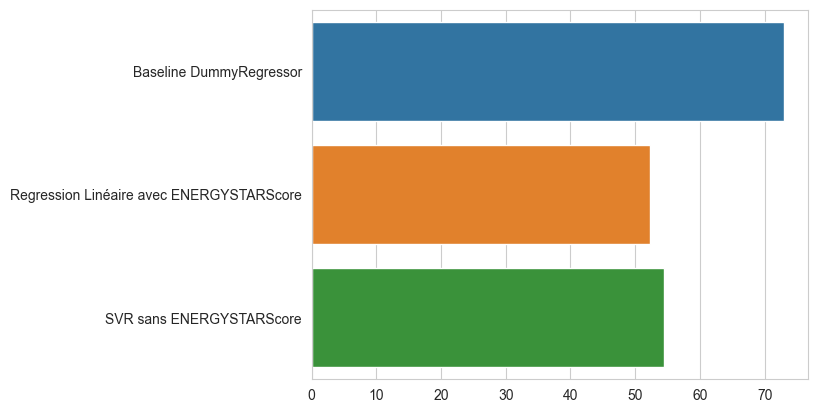

In [25]:
sns.barplot(x=[72.99, 52.3, 54.39], y=['Baseline DummyRegressor', 'Regression Linéaire avec ENERGYSTARScore',  'SVR sans ENERGYSTARScore'])